In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [2]:
# 🔹 Generate Synthetic Data
np.random.seed(42)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = X[:200], X[200:], y[:200], y[200:]

In [3]:
# 🔹 Parameters for Bootstrapping
n_trees = 10  # Number of trees in the forest
trees = []
subsets = []

# 🔹 Bootstrap Sampling and Training Individual Decision Trees
for i in range(n_trees):
    X_sample, y_sample = resample(X_train, y_train, replace=True, random_state=i)
    tree = DecisionTreeClassifier(max_depth=3, random_state=i)
    tree.fit(X_sample, y_sample)
    trees.append(tree)
    subsets.append((X_sample, y_sample))

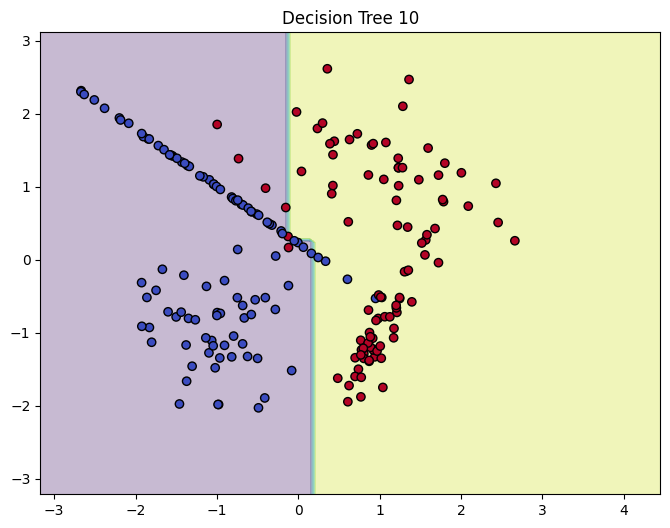

In [5]:
# 🔹 Function to Plot Decision Boundary
def plot_decision_boundary(model, ax):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                         np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')

# 🔹 Animate the Decision Boundaries of Multiple Trees
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    tree = trees[frame]
    ax.set_title(f"Decision Tree {frame+1}")
    plot_decision_boundary(tree, ax)

ani = animation.FuncAnimation(fig, update, frames=n_trees, repeat=True)
ani.save("random_forest_bagging.gif", writer="pillow")
plt.show()